# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Stores

In [48]:
stores = pd.read_csv('stores.csv', header=0)
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [3]:
locations = pd.DataFrame(columns=['city','count'])
locations['city'] = stores['city'].value_counts().index.values
locations['count'] = stores['city'].value_counts().tolist()

locations['latitude']=[-0.1807,-2.1710,-0.2389,-2.9001,-1.2543,-0.9677,-3.2581,-0.9316,
                       -0.2714,-1.0225,-2.2234,-0.3392,-1.5905,-1.6636,-0.0320,-1.8622,
                       -2.2306,-1.4924,-2.6285,-4.0079,-1.8019,-0.9682]
locations['longitude']=[-78.4678,-79.9224,-79.1774,-79.0059,-78.6229,-80.7089,-79.9554,-78.6058,
                        -79.4648,-79.4604,-80.9585,-78.1222,-78.9995,-78.6546,-78.1507,-79.9777,
                        -80.9002,-78.0024,-80.3896,-79.2113,-79.5346,-79.6517]


START = [-1.75,-78.6229]
map = folium.Map(location=START, zoom_start=7, height=500, width=900)
for index, loc in locations.iterrows():
    if loc['count']>10:
        c = 'orange'
    elif loc['count']>5:
        c = 'red'
    elif loc['count']==3:
        c='purple'
    elif loc['count']==2:
        c = 'blue'
    else:
        c='black'
    folium.Marker(location = [loc['latitude'],loc['longitude']],icon=folium.Icon(color=c),popup=str(loc['count'])).add_to(map)
display(map)

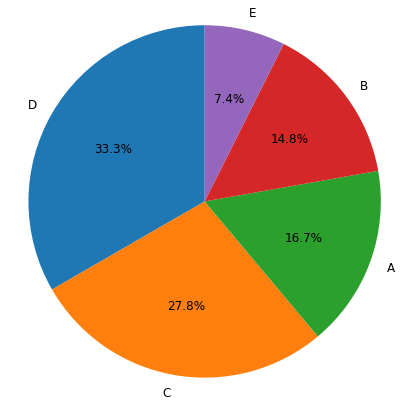

In [346]:
types = stores['type'].value_counts()


plt.close('all')
plt.figure(figsize=(7,7))
matplotlib.rcParams['font.size'] = 12.0
plt.pie(types, labels=types.index.values,autopct='%1.1f%%',startangle=90)
plt.axis('equal') 
plt.show()

In [150]:
transactions = pd.read_csv('transactions_clean.csv', header=0)

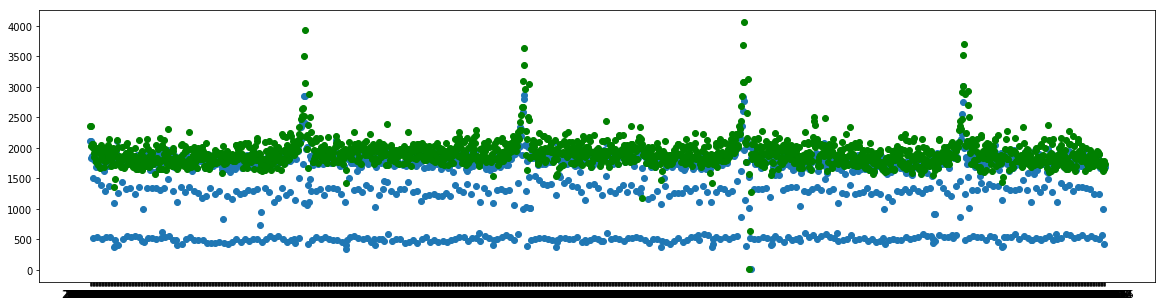

In [124]:
plt.close('all')
plt.figure(figsize=(20,5))
plt.plot_date(x=transactions['date'].tolist(), y=transactions['1'])
plt.plot_date(x=transactions['date'].tolist(), y=transactions['2'], color='g')
plt.show()

In [151]:
transactions = transactions.set_index('date').T

In [152]:
s = stores[['store_nbr','type']]
s['store_nbr'] = s['store_nbr'].map(lambda x: int(x))
transactions['store_nbr']=transactions.index
transactions.reset_index()
transactions['store_nbr'] = transactions['store_nbr'].map(lambda x: int(x))
transactions = transactions.merge(s, how='left', on='store_nbr')

/Users/emily-air13/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [153]:
transactions2 = transactions.drop('store_nbr', axis=1)
transactions2.head()

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06,2013-01-07,2013-01-08,2013-01-09,2013-01-10,...,2017-08-07,2017-08-08,2017-08-09,2017-08-10,2017-08-11,2017-08-12,2017-08-13,2017-08-14,2017-08-15,type
0,2111.0,2111.0,1833.0,1863.0,1509.0,520.0,1807.0,1869.0,1910.0,1679.0,...,1665.0,1766.0,1766.0,1764.0,570.0,1004.0,416.0,1733.0,1693.0,D
1,2358.0,2358.0,2033.0,2066.0,2062.0,1992.0,1911.0,1856.0,1975.0,1761.0,...,1700.0,1688.0,1786.0,1695.0,1698.0,1613.0,1658.0,1788.0,1737.0,D
2,3487.0,3487.0,3026.0,3188.0,3623.0,3590.0,2996.0,2826.0,2932.0,2649.0,...,3046.0,2835.0,2962.0,2841.0,2991.0,3070.0,3075.0,3036.0,2956.0,D
3,1922.0,1922.0,1551.0,1596.0,1825.0,1891.0,1514.0,1397.0,1533.0,1326.0,...,1231.0,1222.0,1325.0,1281.0,1301.0,1304.0,1378.0,1285.0,1283.0,D
4,1903.0,1903.0,1740.0,1642.0,1643.0,1754.0,1577.0,1504.0,1513.0,1449.0,...,1348.0,1183.0,1275.0,1262.0,1183.0,1061.0,1098.0,1225.0,1310.0,D


In [154]:
transactionsA = transactions2[transactions2['type']=='A'].drop('type', axis=1)
transactionsB = transactions2[transactions2['type']=='B'].drop('type', axis=1)
transactionsC = transactions2[transactions2['type']=='C'].drop('type', axis=1)
transactionsD = transactions2[transactions2['type']=='D'].drop('type', axis=1)
transactionsE = transactions2[transactions2['type']=='E'].drop('type', axis=1)

In [155]:
transactionsA = transactionsA.T
transactionsB = transactionsB.T
transactionsC = transactionsC.T
transactionsD = transactionsD.T
transactionsE = transactionsE.T

In [168]:
import datetime
format = '%Y-%m-%d'
transactionsA['date'] = transactionsA.index.values
transactionsA['date'] = pd.to_datetime(transactionsA['date'])
transactionsA = transactionsA.set_index('date')

transactionsB['date'] = transactionsB.index.values
transactionsB['date'] = pd.to_datetime(transactionsB['date'])
transactionsB = transactionsB.set_index('date')

transactionsC['date'] = transactionsC.index.values
transactionsC['date'] = pd.to_datetime(transactionsC['date'])
transactionsC = transactionsC.set_index('date')

transactionsD['date'] = transactionsD.index.values
transactionsD['date'] = pd.to_datetime(transactionsD['date'])
transactionsD = transactionsD.set_index('date')

transactionsE['date'] = transactionsE.index.values
transactionsE['date'] = pd.to_datetime(transactionsE['date'])
transactionsE = transactionsE.set_index('date')

transactionsE.head()

,27,28,35,42,mean
date,,,,,
2013-01-01,950.0,NaN,NaN,1385.0,1167.5
2013-01-02,950.0,NaN,NaN,1385.0,1167.5
2013-01-03,749.0,NaN,NaN,1334.0,1041.5
2013-01-04,651.0,NaN,NaN,1358.0,1004.5
2013-01-05,1033.0,NaN,NaN,1205.0,1119.0


In [156]:
transactionsA['mean'] = transactionsA.mean(axis=1)
transactionsB['mean'] = transactionsB.mean(axis=1)
transactionsC['mean'] = transactionsC.mean(axis=1)
transactionsD['mean'] = transactionsD.mean(axis=1)
transactionsE['mean'] = transactionsE.mean(axis=1)

In [146]:
transactionsA['date'] = str(transactionsA.index.values)

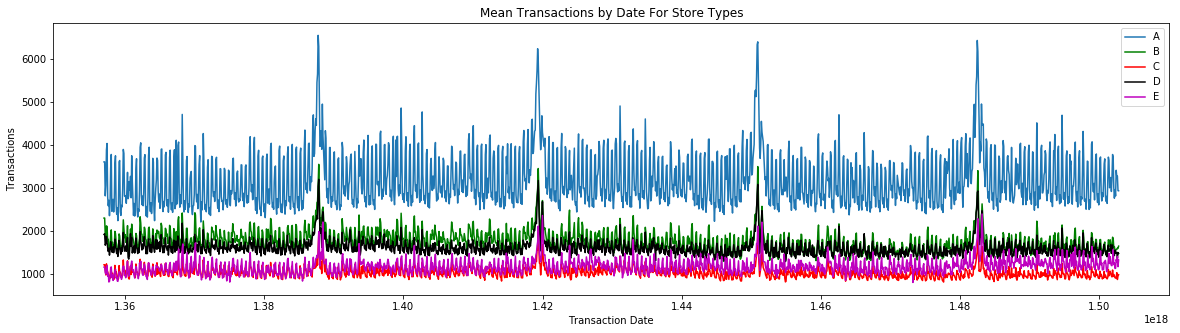

In [171]:
#format = '%Y-%m-%d'
#transactionsA['date'] = transactionsA.index.map(lambda a: datetime.datetime.strptime(a, format))

#transactionsB.index = pd.to_datetime(transactionsB.index.values)
#transactionsC.index = pd.to_datetime(transactionsC.index.values)
#transactionsD.index = pd.to_datetime(transactionsD.index.values)
#transactionsE.index = pd.to_datetime(transactionsE.index.values)

plt.close('all')
plt.figure(figsize=(20,5))
plt.plot(transactionsA.index.values, transactionsA['mean'], label='A')
plt.plot(transactionsB.index.values, transactionsB['mean'], color='g', label='B')
plt.plot(transactionsC.index.values, transactionsC['mean'], color='r', label='C')
plt.plot(transactionsD.index.values, transactionsD['mean'], color='k', label='D')
plt.plot(transactionsE.index.values, transactionsE['mean'], color='m', label='E')

plt.title('Mean Transactions by Date For Store Types')
plt.xlabel('Transaction Date')
plt.ylabel('Transactions')

plt.legend()
plt.show()

# Items

In [119]:
items = pd.read_csv('items.csv', header=0)
items.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


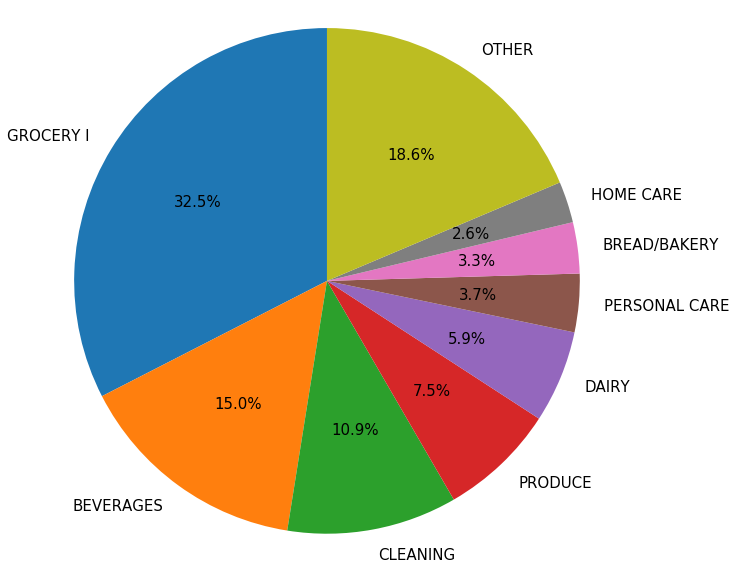

In [137]:
sizes = items['family'].value_counts()
other = sizes[sizes < 100]
sizes_adj = sizes[sizes >=100]
sizes_adj['OTHER'] = other.sum()

plt.figure(figsize=(10,10))
matplotlib.rcParams['font.size'] = 15.0
labels = sizes_adj.index.values
plt.pie(sizes_adj, labels=labels,autopct='%1.1f%%',startangle=90)
plt.axis('equal') 
plt.show()

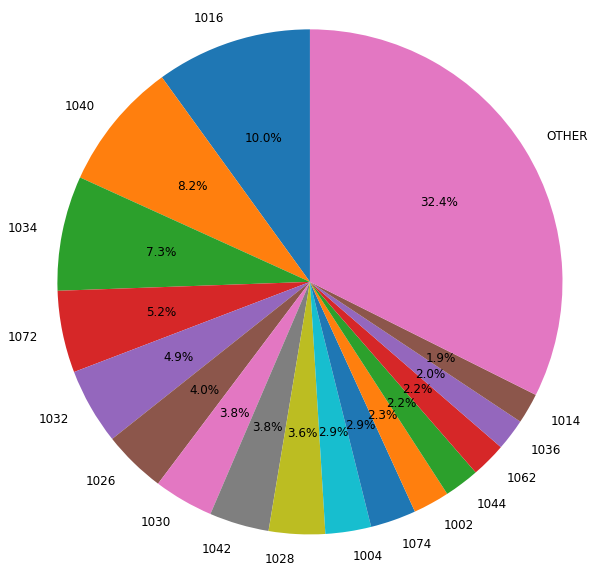

In [142]:
classes = items[items['family']=='GROCERY I']['class'].value_counts()

other = classes[classes < 25]
classes_adj = classes[classes >=25]
classes_adj['OTHER'] = other.sum()


plt.close('all')
plt.figure(figsize=(10,10))
matplotlib.rcParams['font.size'] = 12.0
labels = classes_adj.index.values
plt.pie(classes_adj, labels=labels,autopct='%1.1f%%',startangle=90)
plt.axis('equal') 
plt.show()

# Unit Sales (Train Data)

In [118]:
rawtrain = pd.read_csv('train.csv', header=0, low_memory=False)

In [186]:
unitsales = pd.read_csv('train_SampleForEDA.csv', header=0, low_memory=False)
unitsales.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,...,description_r,transferred_r,holidaytype,locale,description,transferred,day,month,year,transactions
0,26680820,2014-07-07,34,1239812,4.0,False,DAIRY,2170,1,Guayaquil,...,NaN,NaN,NaN,NaN,NaN,NaN,0,7,2014,2509.0
1,67038680,2016-01-08,1,2007133,3.0,False,DAIRY,2172,1,Quito,...,NaN,NaN,NaN,NaN,NaN,NaN,4,1,2016,1823.0
2,55703443,2015-09-04,33,1047696,3.0,False,BEVERAGES,1122,0,Quevedo,...,NaN,NaN,NaN,NaN,NaN,NaN,4,9,2015,901.0
3,55192368,2015-08-29,43,1351305,1.0,False,GROCERY I,1042,0,Esmeraldas,...,NaN,NaN,NaN,NaN,NaN,NaN,5,8,2015,1461.0
4,98161249,2016-11-27,25,830625,3.0,False,CLEANING,3032,0,Salinas,...,NaN,NaN,NaN,NaN,NaN,NaN,6,11,2016,736.0


Counts
* on promotion - also plot as density
* negative

Boxplots: unit sales by store


In [241]:
totals = rawtrain.groupby('date')['unit_sales'].sum()

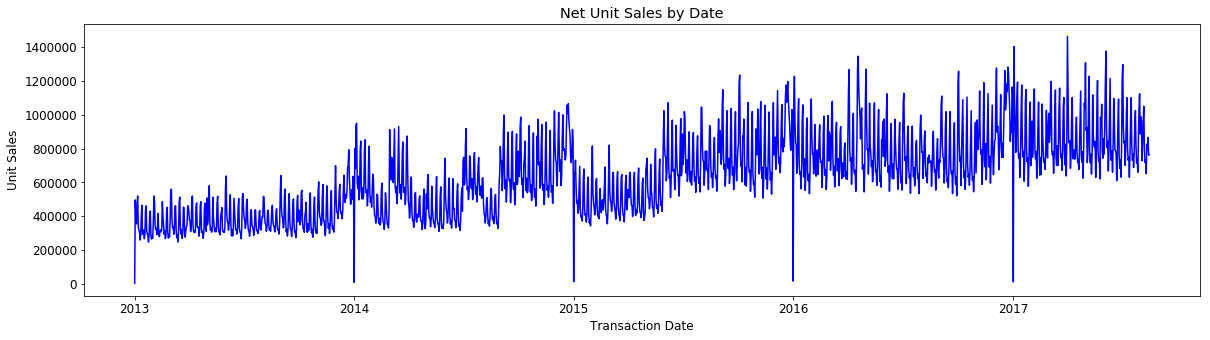

In [318]:
totals.index = totals.index.to_datetime()

plt.close('all')

plt.figure(figsize=(20,5))
#plt.plot_date(totals.index.values, totals, c = 'blue')
plt.plot(totals.index.values, totals, c = 'blue')


plt.title('Net Unit Sales by Date')
plt.xlabel('Transaction Date')
plt.ylabel('Unit Sales')

plt.show()

In [285]:
item_totals = rawtrain.groupby('item_nbr')['unit_sales'].sum()

In [302]:
item_totals_df=pd.DataFrame(columns=['item_nbr','count'])
item_totals_df['item_nbr'] = item_totals.index.values
item_totals_df['count'] = item_totals.values
item_totals_df.set_index('item_nbr')

,count
item_nbr,
96995,10143.000
99197,17870.000
103501,164753.000
103520,201117.000
103665,219669.000
105574,522163.000
105575,865894.000
105576,582947.000
105577,187349.000


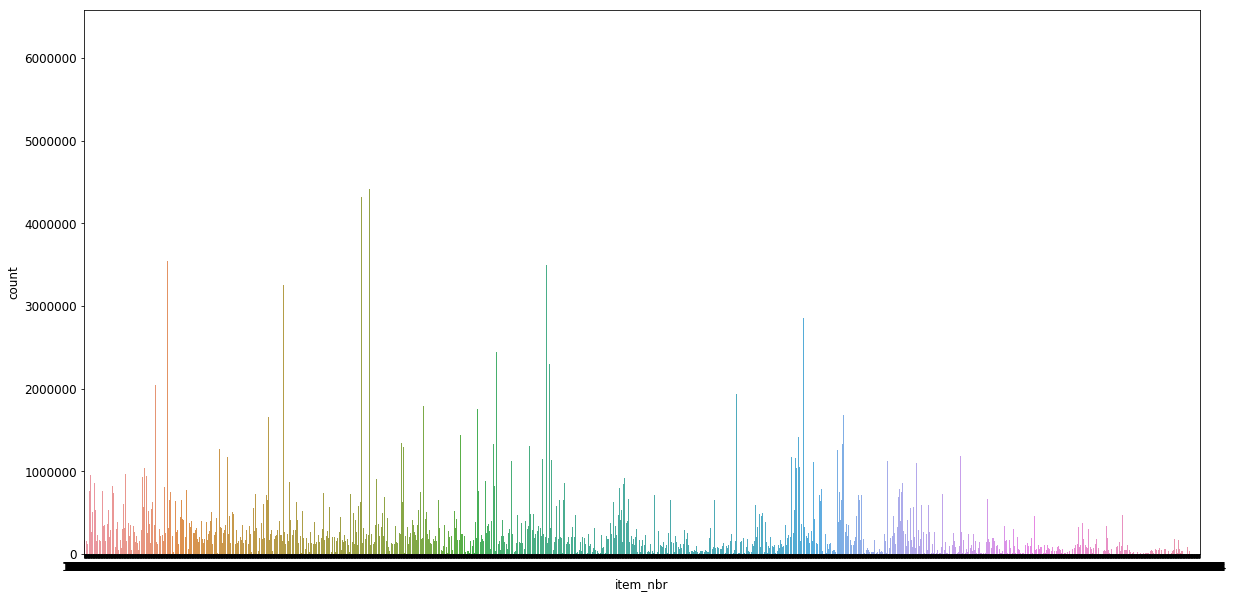

In [362]:
plt.close('all')
fig,ax=plt.subplots(figsize=(20, 10))

sns.barplot(x=item_totals_df['item_nbr'], y=item_totals_df['count'], data=item_totals_df)

plt.show()

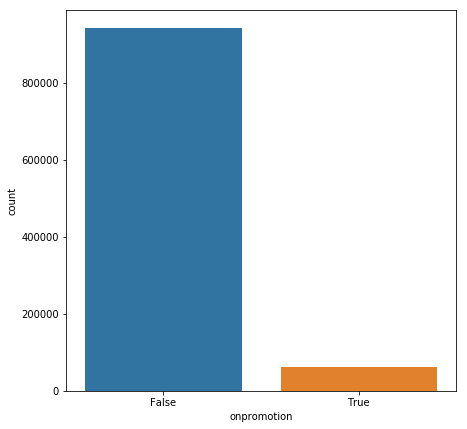

In [11]:
promo_totals = unitsales['onpromotion'].value_counts()
promo = pd.DataFrame(columns=['onpromotion','count'])
promo['onpromotion'] = promo_totals.index.values
promo['count'] = promo_totals.values
plt.close('all')
fig,ax=plt.subplots(figsize=(7, 7))
sns.barplot(x=promo['onpromotion'], y=promo['count'])
plt.show()

In [207]:
falsepromo = unitsales[unitsales['onpromotion']==False]
truepromo = unitsales[unitsales['onpromotion']==True]

falsepromo = falsepromo.sample(n=62517)
falsepromo = falsepromo['unit_sales']
truepromo = truepromo['unit_sales']

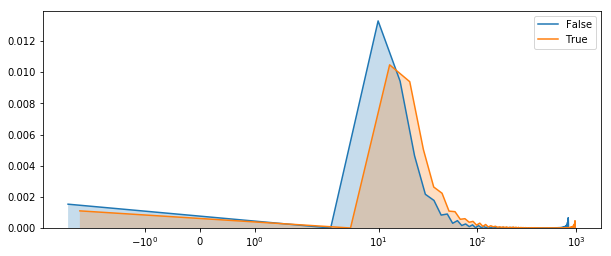

In [208]:
plt.close('all')
fig,ax=plt.subplots(figsize=(10, 4))
ax.set(xscale="symlog")

sns.kdeplot(falsepromo, shade=True, label='False')
sns.kdeplot(truepromo, shade=True, label='True')

plt.show()

# What items have increased sales on holidays?

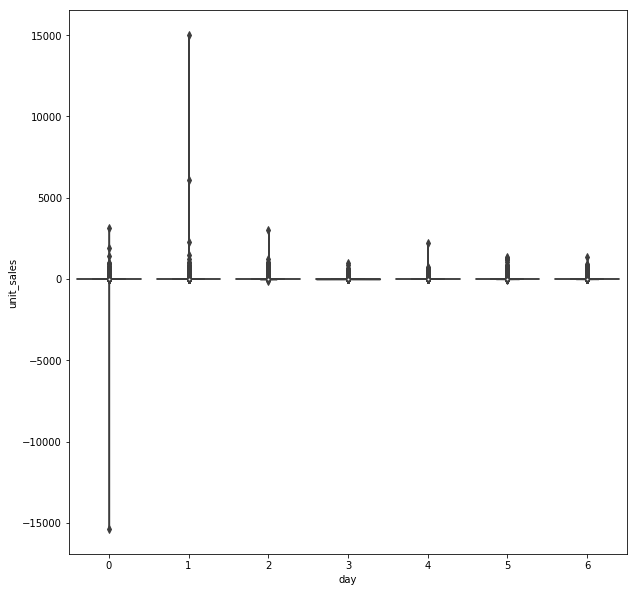

In [180]:
import seaborn as sns

plt.close('all')
plt.figure(figsize=(10,10))
sns.boxplot(y='unit_sales', x='day', data=unitsales)
sns.violinplot(y='unit_sales', x='day', data=unitsales)
plt.show()

In [181]:
unitsales['unit_sales'].min()

-15372.0

In [182]:
unitsales['unit_sales'].max()

15000.0

In [189]:
unitsales = unitsales[unitsales['unit_sales']<1000]
unitsales = unitsales[unitsales['unit_sales']>-1000]

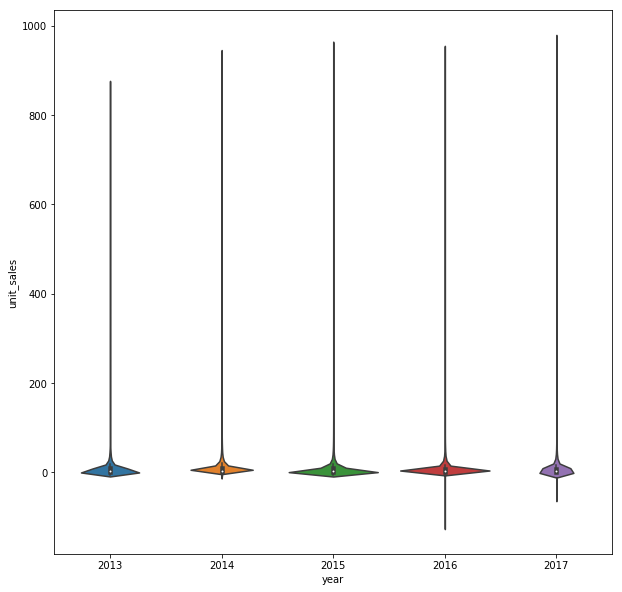

In [192]:

plt.close('all')
plt.figure(figsize=(10,10))
#sns.boxplot(y='unit_sales', x='day', data=unitsales)
sns.violinplot(y='unit_sales', x='year', data=unitsales)
plt.show()

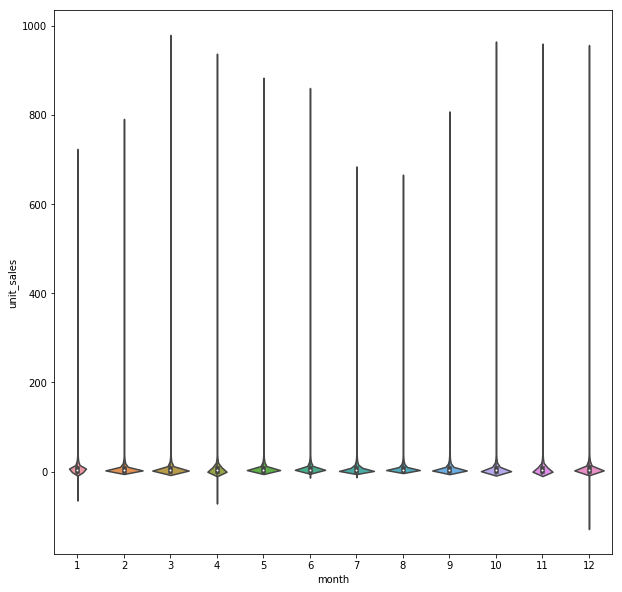

In [191]:

plt.close('all')
plt.figure(figsize=(10,10))
#sns.boxplot(y='unit_sales', x='day', data=unitsales)
sns.violinplot(y='unit_sales', x='month', data=unitsales)
plt.show()

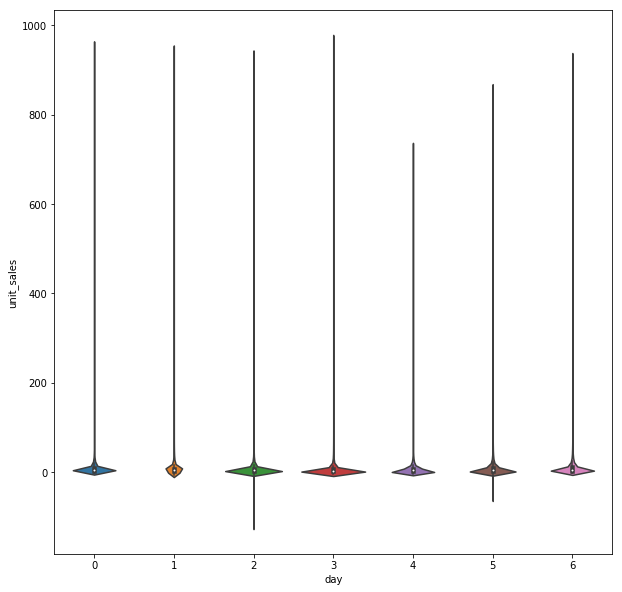

In [190]:

plt.close('all')
plt.figure(figsize=(10,10))
#sns.boxplot(y='unit_sales', x='day', data=unitsales)
sns.violinplot(y='unit_sales', x='day', data=unitsales)
plt.show()

In [250]:
heatmap = ['unit_sales','onpromotion','perishable','transactions','dcoilwtico','family','type',
           'holidaytype_n','holidaytype_r','holidaytype','transferred_n','transferred_r','transferred','day',
           'month','year']

heatmap2 = ['unit_sales','onpromotion','perishable','transactions','dcoilwtico',
           'day',
           'month','year']


In [251]:
correlationset = unitsales[heatmap2]

In [253]:
correlationset.head()

,unit_sales,onpromotion,perishable,transactions,dcoilwtico,day,month,year
0,4.0,0,1,2509.0,104.190000,0,7,2014
1,3.0,0,1,1823.0,33.200000,4,1,2016
2,3.0,0,0,901.0,46.020000,4,9,2015
3,1.0,0,0,1461.0,46.593333,5,8,2015
4,3.0,0,0,736.0,46.013333,6,11,2016


In [252]:
def promo(x):
    if x:
        return 1
    else:
        return 0
    
correlationset['onpromotion'] = correlationset['onpromotion'].map(lambda a: promo(a))

/Users/emily-air13/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [254]:
year = pd.get_dummies(correlationset['year'], prefix='yr')
correlationset = correlationset.join(year)
month = pd.get_dummies(correlationset['month'], prefix='mo')
correlationset = correlationset.join(month)
day = pd.get_dummies(correlationset['day'], prefix='d')
correlationset = correlationset.join(day)

In [240]:
correlationset['holidaytype_n'].value_counts()

Event         37459
Holiday       25031
Additional    19210
Transfer       5030
Work Day       2612
Bridge         1981
Name: holidaytype_n, dtype: int64

In [239]:
storetype = pd.get_dummies(correlationset['type'], prefix='type')
correlationset = correlationset.join(storetype)


In [242]:
correlationset['holidaytype_n'].fillna('None', inplace=True)
correlationset['holidaytype_r'].fillna('None', inplace=True)
correlationset['holidaytype'].fillna('None', inplace=True)

import numpy as np

def holiday(x, y, z):
    if (x=='None' and y=='None' and z=='None'):
        return 0
    else:
        return 1
    
correlationset['holiday'] = correlationset.apply(lambda x: holiday(x['holidaytype_n'], x['holidaytype_r'], x['holidaytype']), axis=1)


In [243]:
correlationset['holiday'].value_counts()

0    907328
1     95876
Name: holiday, dtype: int64

In [244]:
correlationset['transferred_n'].fillna(False, inplace=True)
correlationset['transferred_r'].fillna(False, inplace=True)
correlationset['transferred'].fillna(False, inplace=True)

def transferred(x, y, z):
    if (x or y or z):
        return 1
    else:
        return 0
    
correlationset['transferred_tot'] = correlationset.apply(lambda x: holiday(x['transferred_n'], x['transferred_r'], x['transferred']), axis=1)

In [245]:
correlationset['transferred_tot'].value_counts()

1    1003204
Name: transferred_tot, dtype: int64

In [246]:
correlationset.drop('family', axis=1, inplace=True)
correlationset.drop('type', axis=1, inplace=True)
correlationset.drop('holidaytype_n', axis=1, inplace=True)
correlationset.drop('holidaytype_r', axis=1, inplace=True)
correlationset.drop('holidaytype', axis=1, inplace=True)
correlationset.drop('transferred_n', axis=1, inplace=True)
correlationset.drop('transferred_r', axis=1, inplace=True)
correlationset.drop('transferred', axis=1, inplace=True)

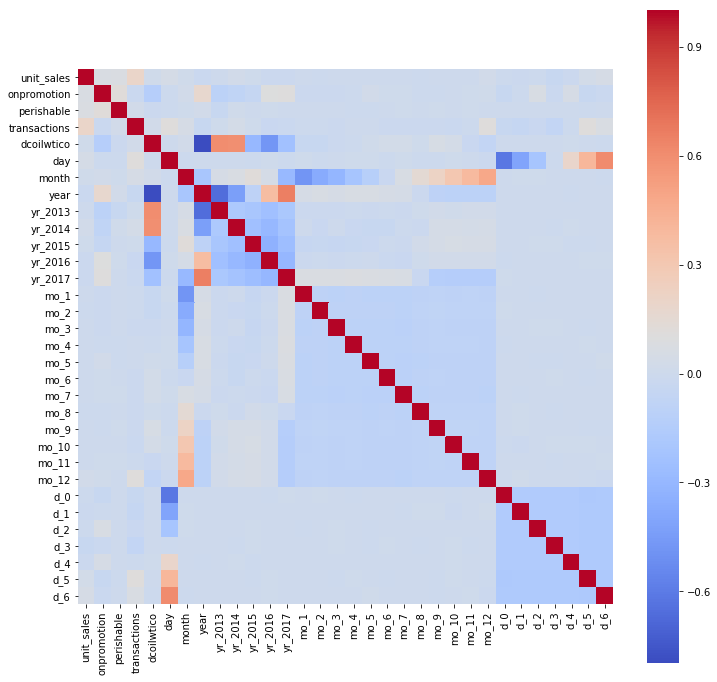

In [255]:
from matplotlib.pyplot import cm

plt.close('all')
plt.figure(figsize=(12,12))
sns.heatmap(correlationset.corr(), square=True, cmap=cm.coolwarm, mask=mask)
plt.show()

The unit sales are weakly correlated with some markers of store size - transactions and type A. There are also very weak correlations with certain item families.

Perishable is correlated with certain families.

There is a negative correlation between year and oil price, but none to unit sales.

In [227]:
print('| Feature       | Correlation')
print('| transactions  | ' + str(correlationset['unit_sales'].corr(correlationset['transactions'])))
print('| dcoilwtico    | ' + str(correlationset['unit_sales'].corr(correlationset['dcoilwtico'])))
print('| year          | ' + str(correlationset['unit_sales'].corr(correlationset['year'])))
print('| perishable    | ' + str(correlationset['unit_sales'].corr(correlationset['perishable'])))
print('| onpromotion   | ' + str(correlationset['unit_sales'].corr(correlationset['onpromotion'])))


| Feature       | Correlation
| transactions  | 0.194204071723
| dcoilwtico    | 0.0131806608113
| year          | -0.0182783347521
| perishable    | 0.0762628744328
| onpromotion   | 0.0698499191923


In [256]:
df = pd.DataFrame(columns=['Feature','Correlation'])
l = list(correlationset)
for item in l:
    c = correlationset['unit_sales'].corr(correlationset[item])
    df = df.append({'Feature': item, 'Correlation': c}, ignore_index=True)
    

In [257]:
df

,Feature,Correlation
0,unit_sales,1.000000
1,onpromotion,0.069850
2,perishable,0.076263
3,transactions,0.194204
4,dcoilwtico,0.013181
5,day,0.042888
6,month,0.011402
7,year,-0.018278
8,yr_2013,0.000045
9,yr_2014,0.022411


In [235]:
correlationset['holiday'].value_counts()

1    1003204
Name: holiday, dtype: int64

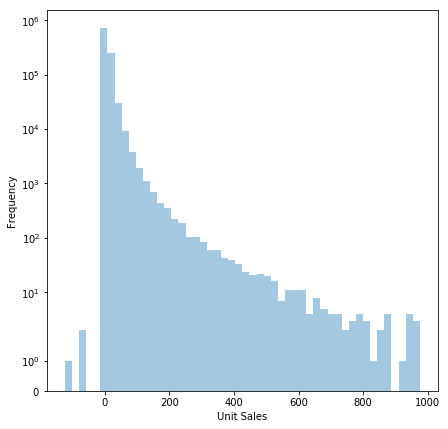

In [274]:
plt.close('all')
fig,ax=plt.subplots(figsize=(7, 7))
ax.set(yscale="symlog")
sns.distplot(unitsales['unit_sales'].values, bins=50, kde=False)
plt.xlabel('Unit Sales')
plt.ylabel('Frequency')
plt.show()


In [276]:
perishable = unitsales[unitsales['perishable']==1]
nonperishable = unitsales[unitsales['perishable']==0]

In [287]:
p = pd.DataFrame({'mean' : perishable.groupby('date')['unit_sales'].mean()}).reset_index()
n = pd.DataFrame({'mean' : nonperishable.groupby('date')['unit_sales'].mean()}).reset_index()

p['date'] = p['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
n['date'] = n['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))

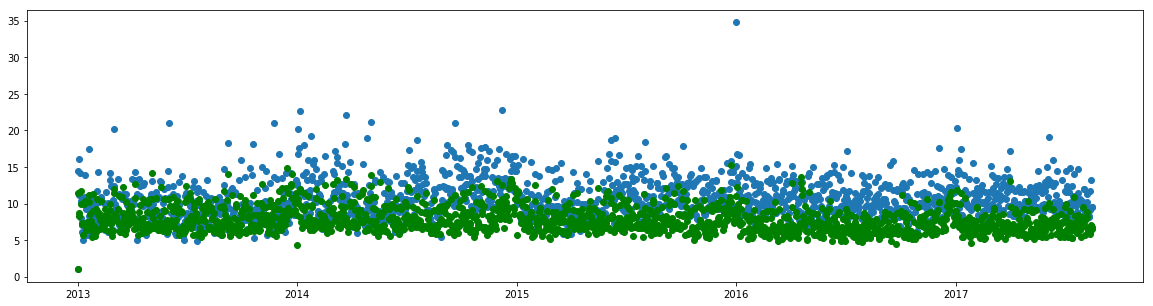

In [288]:
plt.close('all')
plt.figure(figsize=(20,5))
plt.plot_date(x=p['date'].tolist(), y=p['mean'])
plt.plot_date(x=n['date'].tolist(), y=n['mean'], color='g')
plt.show()

In [353]:
#unitsales['date2'] = unitsales['date'].map(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d'))
unitsales_samp = unitsales.sample(n=100)
plt.close('all')
plt.figure(figsize=(20,5))
#sns.tsplot(data = p,  time='date', value='mean')
#sns.tsplot(data = p,  time='date', value='mean')
sns.tsplot(data = unitsales,  time='date2', value='unit_sales', condition='perishable')
plt.show()

/Users/emily-air13/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: 

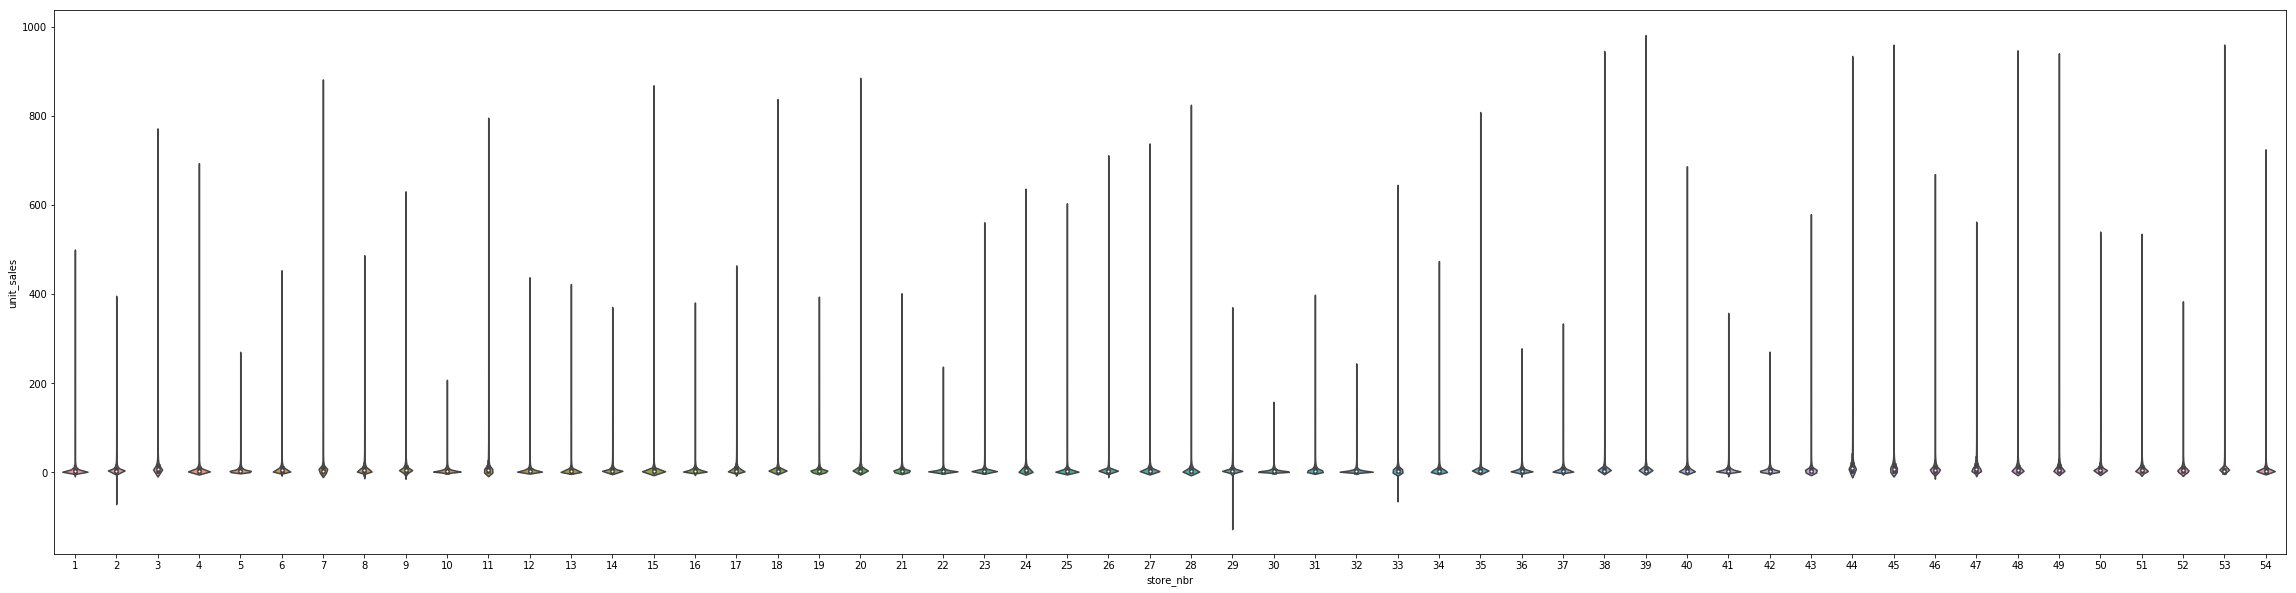

In [301]:
plt.close('all')
plt.figure(figsize=(40,10))
#sns.boxplot(y='unit_sales', x='store_nbr', data=unitsales)
sns.violinplot(y='unit_sales', x='store_nbr', data=unitsales)
plt.show()

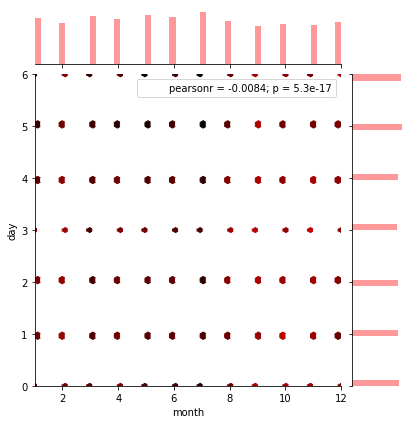

In [302]:
plt.close('all')
sns.jointplot(x=unitsales['month'], y=unitsales['day'], kind="hex", color="r")
plt.show()

In [312]:
time = unitsales[['day','month','unit_sales']]
time.reset_index()

,index,day,month,unit_sales
0,0,0,7,4.0
1,1,4,1,3.0
2,2,4,9,3.0
3,3,5,8,1.0
4,4,6,11,3.0
5,5,5,5,1.0
6,6,2,8,3.0
7,7,0,7,7.0
8,8,2,1,9.0
9,9,2,8,2.0


In [324]:
time = pd.pivot_table(time, values=['unit_sales'], index=['day'], columns=['month'], aggfunc=np.mean)
time = pd.DataFrame(time.to_records())
time.columns = [hdr.replace("('unit_sales', ","").replace(")", "") for hdr in time.columns]
time.drop('day', axis=1, inplace=True)

time

,1,2,3,4,5,6,7,8,9,10,11,12
0,8.680054,7.740546,8.117037,8.142552,8.070531,8.210626,8.370014,8.240337,8.350514,8.221755,8.458373,10.042629
1,7.531927,7.732779,7.681612,7.690650,7.618826,7.635972,7.687034,7.454077,7.727998,7.240676,7.897080,9.352695
2,8.246628,7.439707,8.193205,7.861483,7.794523,7.821611,8.194497,7.443405,8.325876,7.885631,8.269223,10.129847
3,6.982041,6.900431,6.882284,6.665295,6.845187,6.743988,6.976758,6.696732,6.849062,6.801563,7.092529,8.506627
4,8.044062,7.645226,7.868448,7.642038,7.852797,7.457337,7.774646,7.769548,7.808171,7.836297,7.865467,9.368277
5,9.938217,9.467985,9.742884,9.636290,9.540543,10.115656,9.416033,8.864468,9.896705,9.485656,9.708633,10.380486
6,11.396372,9.467283,10.627891,10.637036,10.416471,10.491654,10.445553,9.617027,11.440296,11.311431,10.969085,11.376618


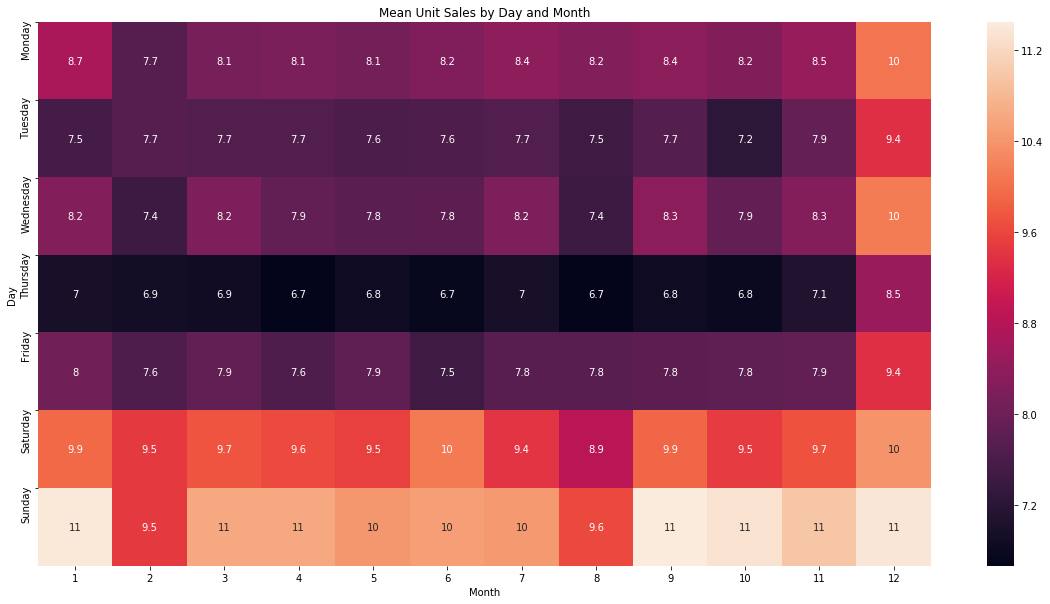

In [331]:

plt.close('all')
plt.figure(figsize=(20,10))
sns.heatmap(time, annot=True)
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.yticks(time.index.values, labels)
plt.ylabel('Day')
plt.xlabel('Month')
plt.title('Mean Unit Sales by Day and Month')
plt.show()

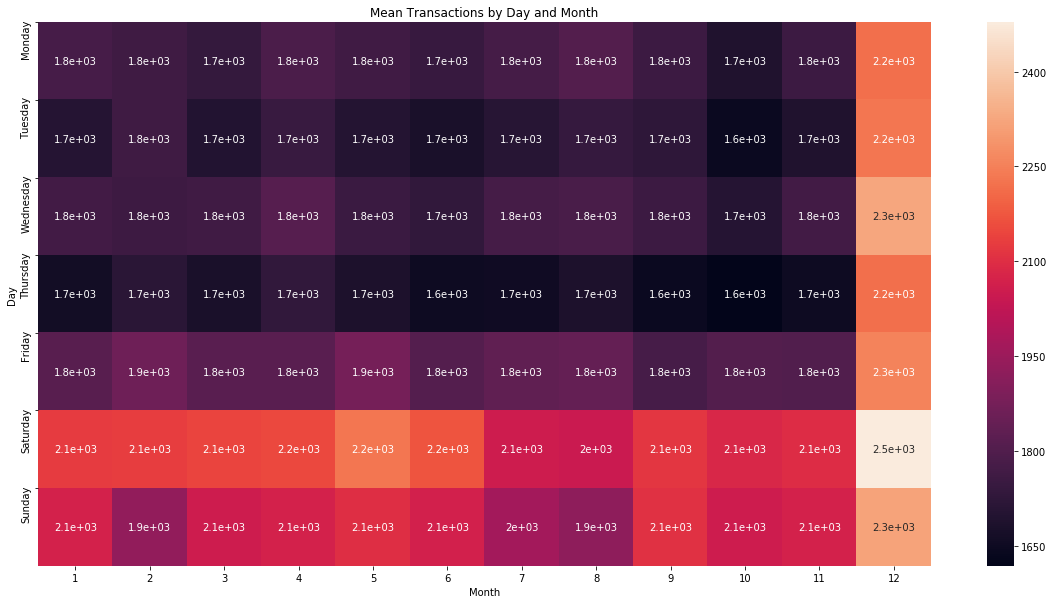

In [335]:
time2 = unitsales[['day','month','transactions']]
time2.reset_index()
time2 = pd.pivot_table(time2, values=['transactions'], index=['day'], columns=['month'], aggfunc=np.mean)
time2 = pd.DataFrame(time2.to_records())
time2.columns = [hdr.replace("('transactions', ","").replace(")", "") for hdr in time2.columns]
time2.drop('day', axis=1, inplace=True)


plt.close('all')
plt.figure(figsize=(20,10))
sns.heatmap(time2, annot=True)
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.yticks(time2.index.values, labels)
plt.ylabel('Day')
plt.xlabel('Month')
plt.title('Mean Transactions by Day and Month')
plt.show()

In [345]:
pairs = ['unit_sales','perishable','transactions','dcoilwtico']
pair_set = unitsales[pairs]

/Users/emily-air13/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


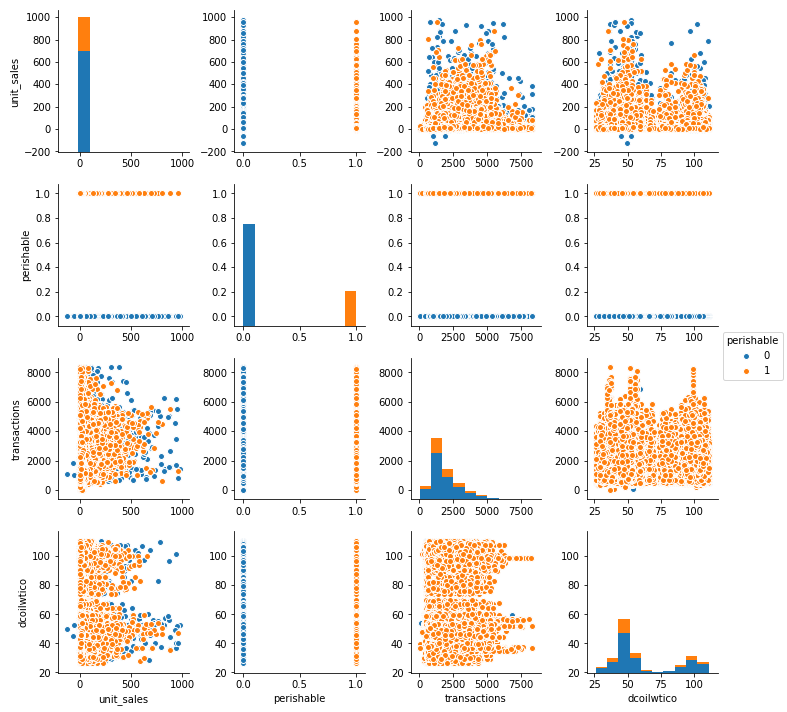

In [347]:
pair_set.dropna(inplace=True)
plt.close('all')
sns.pairplot(pair_set, hue='perishable')
plt.show()

/Users/emily-air13/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


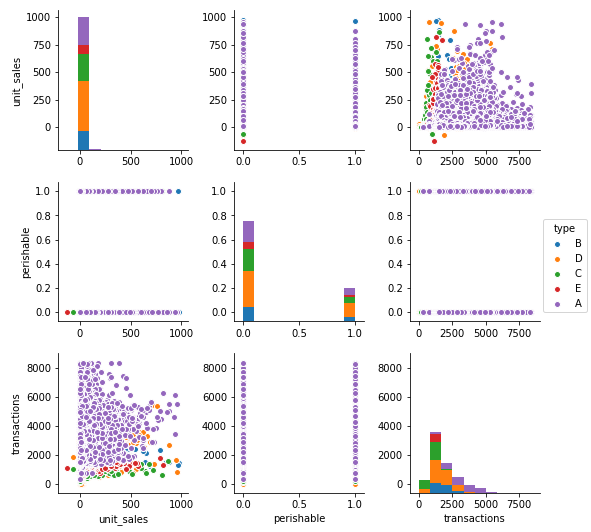

In [352]:
pairs2 = ['unit_sales','perishable','transactions','type']
pair_set2 = unitsales[pairs2]

pair_set2.dropna(inplace=True)
plt.close('all')
sns.pairplot(pair_set2, hue='type')
plt.show()